# NYC Green Taxi Trip Analysis

## Importing Libraries

In [69]:
# Importing Basic Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import pyarrow.parquet as pq  # Parquet file handling
import seaborn as sns  # Data visualization
import matplotlib as map  # Plotting utilities
import matplotlib.pyplot as plt  # Plotting library
import datetime as dt  # Date and time operations

# Importing all the models and all dependent libraries.
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.pipeline import Pipeline  # Building pipelines
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical data
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
import sklearn.linear_model as lm  # Linear models
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.linear_model import Lasso  # Lasso Regression
from sklearn.linear_model import Ridge  # Ridge Regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor
import xgboost as xgb  # XGBoost Regressor
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Regression metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

import warnings  # Suppressing warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [70]:
# Creating an empty dataframe.
df = pd.DataFrame()

# Printing shape of the dataframe.
print(df.shape)

# Function to read and append trip data from parquet files.
def read_trip_data(file_path):
    global df
    var_tab = pd.read_parquet(file_path)
    df = df.append(var_tab, ignore_index=True)
    print(f"{df.shape} records have been appended")

# List of file paths to import data.
file_name = [
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-05.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-06.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-07.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-08.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-09.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-10.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-11.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-12.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet'
]

# Loop to import data from parquet files.
for i in file_name:
    print(f"Loading {i} file.")
    read_trip_data(i)
    print(f"-----------------------------------File Loaded {i} ----------------------------------------")

# Displaying the shape of the combined dataframe.
print(df.shape)

(0, 0)
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet file.
(62495, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet file.
(131894, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet file.
(210431, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet file.


(286567, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-05.parquet file.
(363458, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-05.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-06.parquet file.
(437176, 20) records have been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-06.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-07.parquet file.
(501368, 20) records have been appended
-----------------------------------File Loaded https://d37ci

In [71]:
# Path to the taxi zone lookup CSV file
taxizonefilepath = 'taxi+_zone_lookup.csv'

# Reading the CSV file into a DataFrame
taxizone_df = pd.read_csv(taxizonefilepath)

# Printing the shape of the DataFrame (rows, columns)
print(taxizone_df.shape)

(265, 4)


In [72]:
# Path to the holidays CSV file
holidaysfilepath = 'Holidays.csv'

# Reading the CSV file into a DataFrame
holidays_df = pd.read_csv(holidaysfilepath)

# Printing the shape of the DataFrame (rows, columns)
print(holidays_df.shape)

(23, 1)


## Initial Data Distribution Analysis

### 1. Trip Distance

count    908613.000000
mean         78.723221
std        3124.612949
min           0.000000
25%           1.150000
50%           2.000000
75%           3.730000
max      360068.140000
Name: trip_distance, dtype: float64


<Axes: xlabel='trip_distance'>

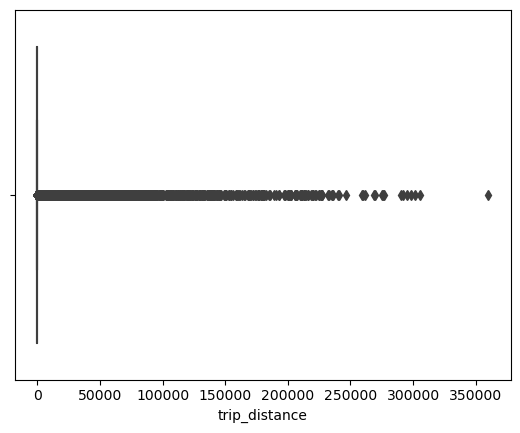

In [73]:
print(df['trip_distance'].describe())
sns.boxplot(x = df['trip_distance'],orient = 'h')

### 2. Fare Amount

count    908613.000000
mean         15.392788
std          15.062441
min        -350.080000
25%           7.900000
50%          11.500000
75%          18.200000
max        2020.200000
Name: fare_amount, dtype: float64


<Axes: >

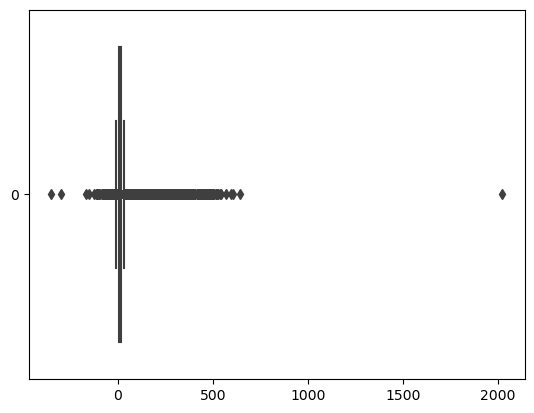

In [74]:
print(df['fare_amount'].describe())
sns.boxplot(df['fare_amount'],orient = 'h')

### 3. Payment Mode

   index  payment_type
0    1.0        517555
1    2.0        290409
2    3.0          4731
3    4.0          1240
4    5.0            14


([<matplotlib.patches.Wedge at 0x222b0fb50c0>,
 [Text(-0.2948089689385652, -1.0597583082162556, '1.0'),
  Text(0.3192088177417596, 1.0526660109815973, '2.0'),
  Text(-1.9442490965416783, 1.7262373679760463, '3.0'),
  Text(-1.4494899215986925, 1.228405050129564, '4.0'),
  Text(-0.9192116635992374, 0.7713947870598572, '5.0')],
 [Text(-0.16080489214830826, -0.5780499862997758, '63.6%'),
  Text(0.1741139005864143, 0.5741814605354166, '35.7%'),
  Text(-1.5703550395144326, 1.3942686433652682, '0.6%'),
  Text(-1.0680452053885103, 0.9051405632533629, '0.2%'),
  Text(-0.5362068037662218, 0.44998029245158333, '0.0%')])

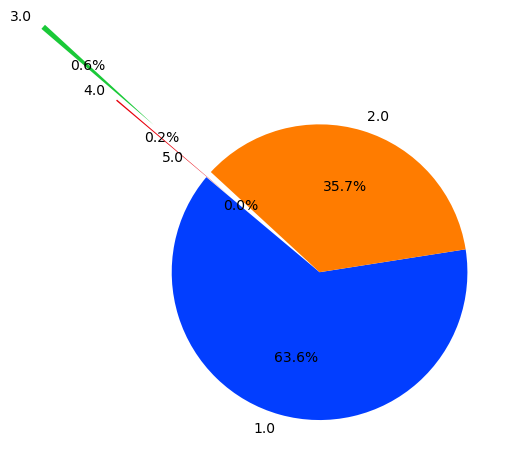

In [75]:
payment_mode = df['payment_type'].value_counts().reset_index()
print(payment_mode)
palette_color = sns.color_palette('bright')
explode = [0, 0, 1.5, 0.8, 0.1]
plt.pie(payment_mode['payment_type'],labels = payment_mode['index'], colors= palette_color,explode=explode,autopct='%1.1f%%', startangle=140)

## Data Preparation and Column

### 1. Taxi Zone Integration


In [76]:
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='PULocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'pickup_borough', 'Zone' : 'pickup_zone', 'service_zone' : 'pickup_service_zone'},inplace = True)
print(df.shape)
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='DOLocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'drop_borough', 'Zone' : 'drop_zone', 'service_zone' : 'drop_service_zone'},inplace = True)
print(df.shape)

(908613, 23)
(908613, 26)


### 2. Column Selection and Removal

In [77]:
#Reasons for dropping following columns:
#ehail_fee : this column have 0 records
#passenger_count: As the number of passengers are added by the driver it might be inaccurate.
#store_and_fwd_flag,trip_type,payment_type we are dropping as they are not required for our price prediction.
df.drop(columns = ['store_and_fwd_flag','ehail_fee','trip_type','payment_type','passenger_count'],inplace = True)
#Dropping all the column where every single entry is missing.
df.dropna(axis = 1,how = 'all', inplace = True)
print(df.shape)

(908613, 21)


### 3. Column Renaming

In [78]:
#Renaming pickup and dropoff date columns
df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime'})

### 4. Trip Filtering

#### a. Trip Distance

In [79]:
#Checking corrupted records for 'trip_distance' as it is one of the essential component for our analysis.
print(df.trip_distance.describe())
#To verify and remove records with the distance in negative or 0 miles or more than 100 miles.
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
print(df.trip_distance.describe())

count    908613.000000
mean         78.723221
std        3124.612949
min           0.000000
25%           1.150000
50%           2.000000
75%           3.730000
max      360068.140000
Name: trip_distance, dtype: float64
count    854965.000000
mean          3.245279
std           3.432387
min           0.010000
25%           1.300000
50%           2.140000
75%           3.870000
max          95.900000
Name: trip_distance, dtype: float64


#### b. Fare Amount

In [80]:
#Checking corrupted records for 'fare_amount' as we will be predicting it.
print(df['fare_amount'].describe())
#Filtering all the rows where the amount is less than $3 as it is the base fare.
#Ref for base fare--> https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
df = df[df['fare_amount'] > 3]
print(df.shape)

count    854965.000000
mean         14.971633
std          13.862570
min        -300.000000
25%           7.900000
50%          11.060000
75%          17.530000
max         595.500000
Name: fare_amount, dtype: float64
(845964, 21)


#### c. Time Constraints

In [81]:
#Calculating trip time in minutes
df['trip_time'] = round((df['dropoff_datetime'] - df['pickup_datetime']) / np.timedelta64(60,'s'),2)

#Checking corrupted records for 'trip_time' as we will be predicting it.
print(df['trip_time'].describe())

#Dropping all the records where 'trip_time' is less than 1 minute more than 3hours i.e 180 mins.
df = df[(df['trip_time'] > 1) & (df['trip_time'] < 180)]
print(df.shape)

count    845964.000000
mean         20.116554
std          75.241299
min         -54.020000
25%           8.000000
50%          12.520000
75%          19.620000
max        1439.920000
Name: trip_time, dtype: float64
(836671, 22)


#### d. Incorrect Rate Code

In [82]:
#Here we are filtering trips with Rate code 99 as they are incorrect.
#Valid Rate Codes :1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride
#Document Link : https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

df = df[df['RatecodeID'] != 99]

### 5. Handling Missing Values

In [83]:
#We are dropping all trips with missing data.
print(df.isna().sum())
df.dropna(inplace = True)

VendorID                     0
pickup_datetime              0
dropoff_datetime             0
RatecodeID               91693
PULocationID                 0
DOLocationID                 0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     91693
pickup_borough               0
pickup_zone                515
pickup_service_zone        799
drop_borough                 0
drop_zone                 3583
drop_service_zone         4479
trip_time                    0
dtype: int64


### 6. DateTime Feature Extraction

In [84]:
#Extracting Date and Time from pickup and drop date column.

df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime'].dt.date)

In [85]:
#Marking if the trip is recorded in peak hour or not.
# Adding peak_hours as [7,8,9,18,19,20]
df['peak_hours'] = df['pickup_hour'].apply(lambda x: 1 if x in [7,8,9,10,17,18,19] else 0)

In [86]:
#Flagging if trip was recorded on a holiday or not.
holidays_df['Holidays'] = pd.to_datetime(holidays_df['Holidays'])
df = pd.merge(df, holidays_df, left_on='pickup_date', right_on='Holidays', how='left')
df['Holidays'].fillna(False, inplace=True)
df['holiday_flag'] = df['Holidays'].apply(lambda x: 0 if x is False else 1)
df = df.drop(columns = 'Holidays')
df.drop(columns = ['pickup_datetime','dropoff_datetime','pickup_date','dropoff_date'],inplace = True)
print(df.shape)

(740737, 25)


### 7. Congestion Surcharge Flagging

In [87]:
df['surcharge_flag'] = df['congestion_surcharge'].apply(lambda x: 1 if x > 0 else 0)

In [88]:
#Final shape after preprocessing and data cleaning
df.shape

(740737, 26)

## Exploratory Data Analysis

### 1. Vendor

([<matplotlib.patches.Wedge at 0x222a7ef4580>,
 [Text(0.491269861918107, -0.9842021757601251, '2'),
  Text(-0.49126990799193576, 0.984202152762122, '1')],
 [Text(0.26796537922805835, -0.5368375504146137, '87.0%'),
  Text(-0.26796540435923766, 0.5368375378702482, '13.0%')])

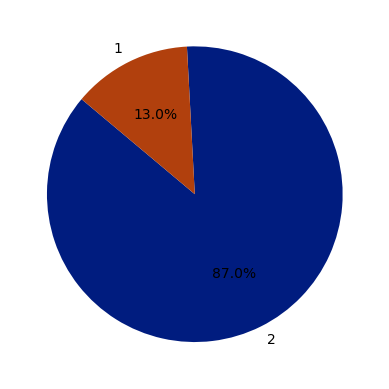

In [89]:
vendor = df['VendorID'].value_counts().reset_index()
color = sns.color_palette('dark')
plt.pie(vendor['VendorID'],labels = vendor['index'],colors=color,autopct= '%1.1f%%', startangle=140)

### 2. Rate Code

In [90]:
df['RatecodeID'].value_counts()

1.0    715649
5.0     22179
2.0      2447
3.0       321
4.0       141
Name: RatecodeID, dtype: int64

   index  RatecodeID
0    1.0      715649
1    5.0       22179
2    2.0        2447
3    3.0         321
4    4.0         141


Text(0.5, 1.0, 'Rate Code')

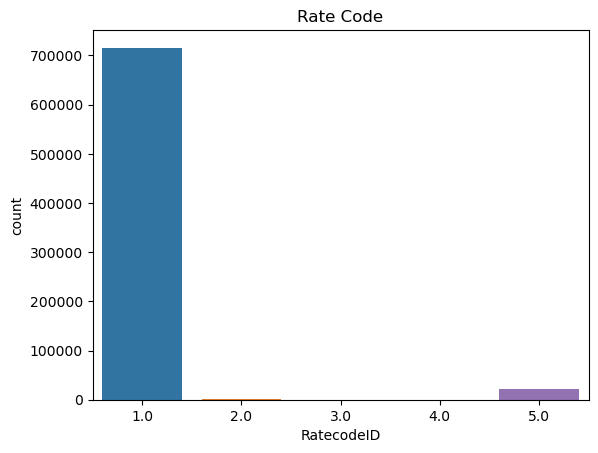

In [91]:
print(df['RatecodeID'].value_counts().reset_index())
rate_code = df['RatecodeID'].value_counts().reset_index()
explode = [0,0,0,1,2]
#plt.pie(rate_code['RatecodeID'], labels = rate_code['index'], colors = color,autopct= '%1.1f%%', startangle=180,explode = explode)
sns.countplot(x='RatecodeID', data=df)
plt.title("Rate Code")

### 3. Hourly Distribution of Trip Counts

Text(0.5, 1.0, 'Hourly Distribution of Trip Counts')

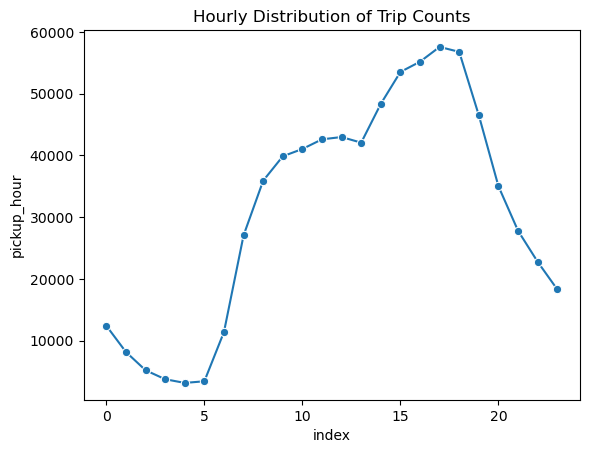

In [92]:
 hourlydistribution = df['pickup_hour'].value_counts().reset_index().sort_values(by = 'index')
 sns.lineplot(x = hourlydistribution['index'], y=hourlydistribution['pickup_hour'],marker='o')
 plt.title("Hourly Distribution of Trip Counts")

### 4. Trip Distance

count    740737.000000
mean          2.997302
std           2.948287
min           0.010000
25%           1.280000
50%           2.030000
75%           3.600000
max          95.500000
Name: trip_distance, dtype: float64


<Axes: xlabel='trip_distance'>

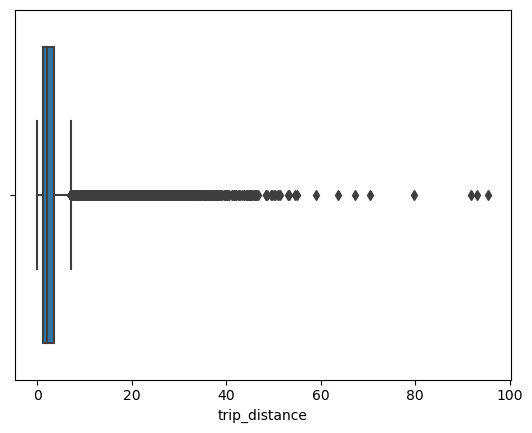

In [93]:
print(df['trip_distance'].describe())
sns.boxplot(x = df['trip_distance'],orient = 'h')

### 5. Fare Amount

count    740737.000000
mean         13.822768
std          11.312454
min           3.500000
25%           7.500000
50%          10.500000
75%          16.000000
max         499.000000
Name: fare_amount, dtype: float64


<Axes: >

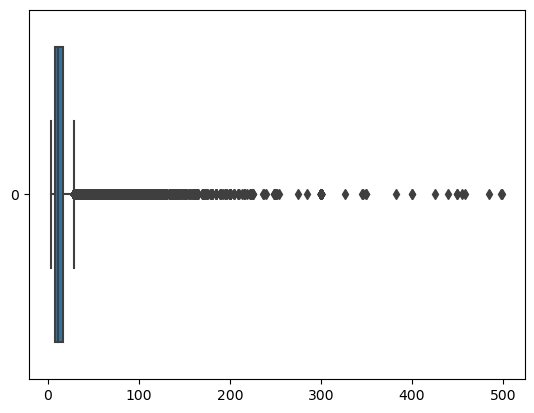

In [94]:
print(df['fare_amount'].describe())
sns.boxplot(df['fare_amount'],orient = 'h')

### 6. Trip Time

count    740737.000000
mean         14.953037
std          11.874643
min           1.020000
25%           7.750000
50%          11.970000
75%          18.320000
max         178.550000
Name: trip_time, dtype: float64


<Axes: xlabel='trip_time'>

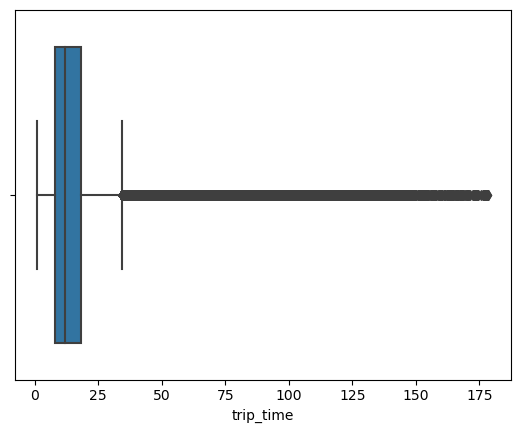

In [95]:
print(df['trip_time'].describe())
sns.boxplot(x = df['trip_time'])

### 7. Tip Amount

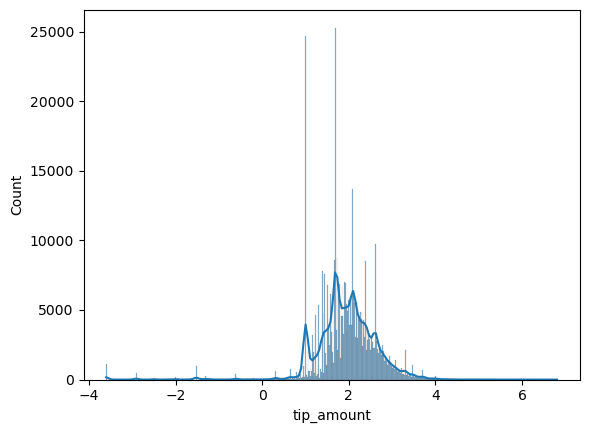

In [96]:
sns.histplot(np.log(df['tip_amount'])+1, kde=True)
plt.show()

### 8. Total Amount

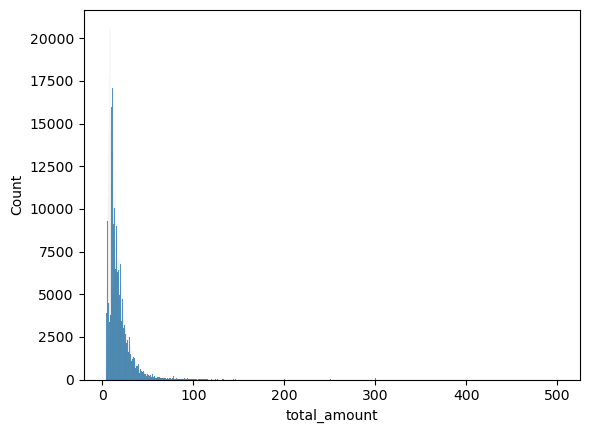

In [97]:
sns.histplot(df['total_amount'])
plt.show()

### 9. Trip distribution by Day

In [98]:
print(df['pickup_dayofweek'].value_counts())

3    117543
2    114668
4    114479
1    111195
0    103797
5     96623
6     82432
Name: pickup_dayofweek, dtype: int64


Text(0.5, 1.0, 'Trip distribution by Day')

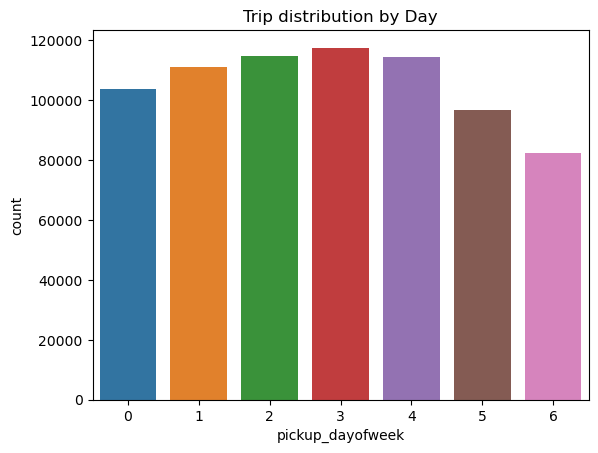

In [99]:
sns.countplot(x='pickup_dayofweek', data=df)
plt.title('Trip distribution by Day')

### 11. Number of Trips by Pickup LocationID

    PULocationID                  pickup_zone       0
0             74            East Harlem North  147007
1             75            East Harlem South  107052
2             41               Central Harlem   53128
3            166          Morningside Heights   46554
4             95                 Forest Hills   35841
5             43                 Central Park   27508
6             82                     Elmhurst   25070
7             42         Central Harlem North   24713
8            244     Washington Heights South   22650
9             97                  Fort Greene   21558
10             7                      Astoria   21558
11            65  Downtown Brooklyn/MetroTech   20309
12           130                      Jamaica   15965
13           129              Jackson Heights   11585
14           260                     Woodside   11282


Text(0.5, 1.0, 'Number of Trips by Pickup LocationID')

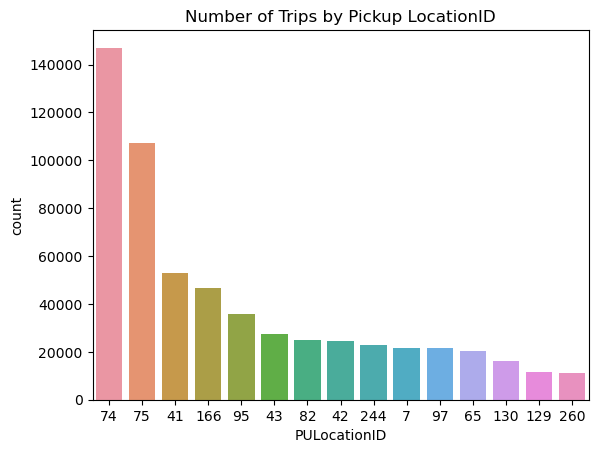

In [100]:
print(df[["PULocationID","pickup_zone"]].value_counts().reset_index().head(15))
sns.countplot(x='PULocationID', data=df, order=df.PULocationID.value_counts().iloc[:15].index)
plt.title('Number of Trips by Pickup LocationID')

### 12. Dropoff LocationID

In [101]:
print(df["drop_zone"].value_counts().head(15))

East Harlem North        40447
East Harlem South        37076
Central Harlem           31139
Central Harlem North     29918
Upper East Side North    29289
Upper West Side North    26841
Morningside Heights      25100
Yorkville West           18687
Manhattan Valley         17597
Upper West Side South    16846
LaGuardia Airport        16735
Central Park             13768
Forest Hills             13516
Hamilton Heights         12453
Upper East Side South    11953
Name: drop_zone, dtype: int64


    DOLocationID              drop_zone      0
0             74      East Harlem North  40447
1             75      East Harlem South  37076
2             41         Central Harlem  31139
3             42   Central Harlem North  29918
4            236  Upper East Side North  29289
5            238  Upper West Side North  26841
6            166    Morningside Heights  25100
7            263         Yorkville West  18687
8            151       Manhattan Valley  17597
9            239  Upper West Side South  16846
10           138      LaGuardia Airport  16735
11            43           Central Park  13768
12            95           Forest Hills  13516
13           116       Hamilton Heights  12453
14           237  Upper East Side South  11953


Text(0.5, 1.0, 'Number of Trips by Dropoff LocationID')

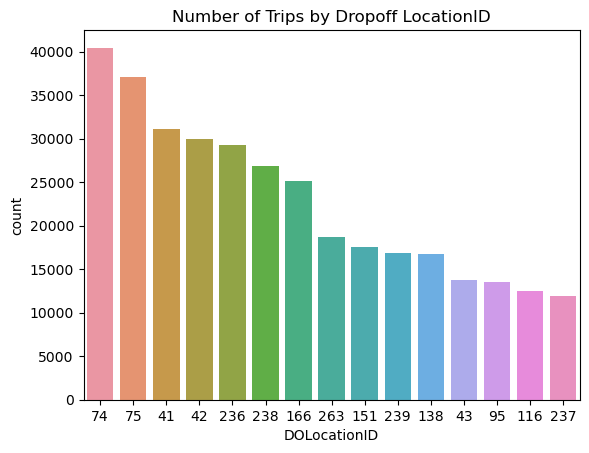

In [102]:
print(df[["DOLocationID","drop_zone"]].value_counts().reset_index().head(15))
sns.countplot(x='DOLocationID', data=df,order=df.DOLocationID.value_counts().iloc[:15].index)
plt.title('Number of Trips by Dropoff LocationID')

### 13. Distance VS Fare Amount

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

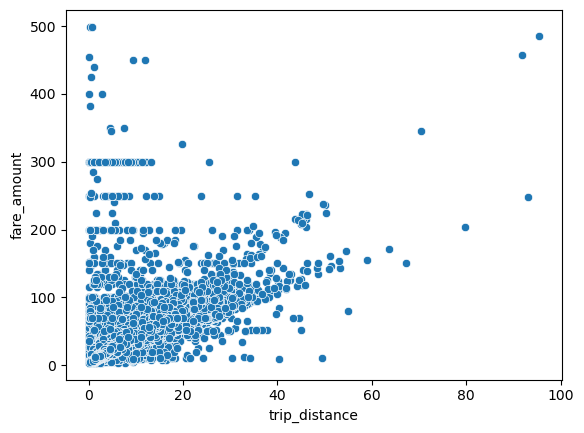

In [103]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)

### 14. Distance VS Pickup Hour

<Axes: xlabel='pickup_hour', ylabel='trip_distance'>

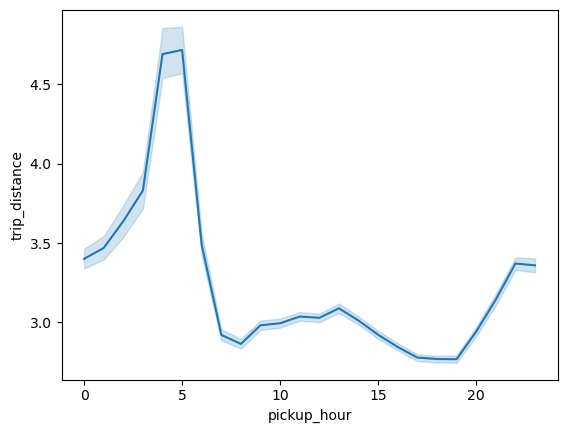

In [104]:
sns.lineplot(x='pickup_hour', y='trip_distance', data=df)

### 15. Fare Amount VS Week Day

<Axes: xlabel='pickup_dayofweek', ylabel='fare_amount'>

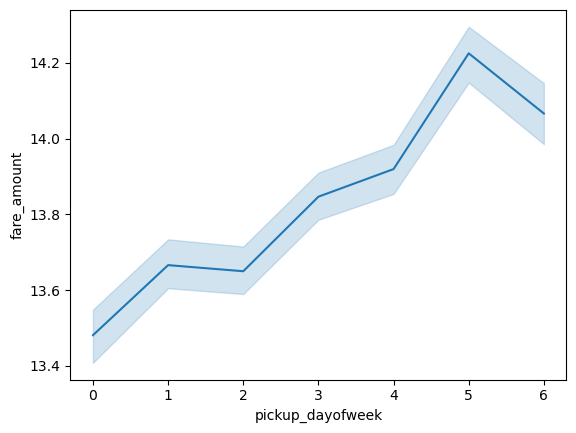

In [105]:
sns.lineplot(x='pickup_dayofweek',y='fare_amount',data = df)

### 16. Tip Amount VS Pickup Hours

<Axes: xlabel='pickup_hour', ylabel='tip_amount'>

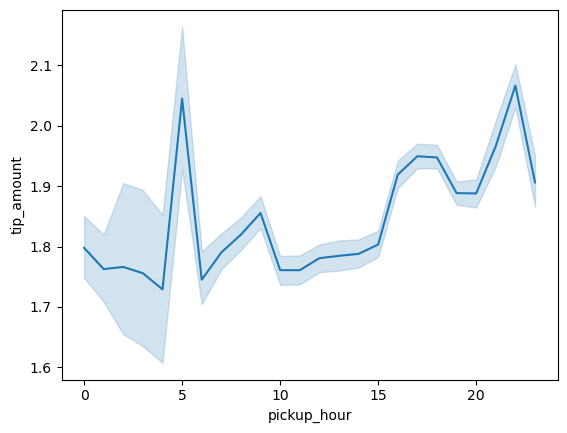

In [106]:
sns.lineplot(x='pickup_hour',y='tip_amount',data = df)

### 17. Tip Amount VS Week Day

<Axes: xlabel='pickup_dayofweek', ylabel='tip_amount'>

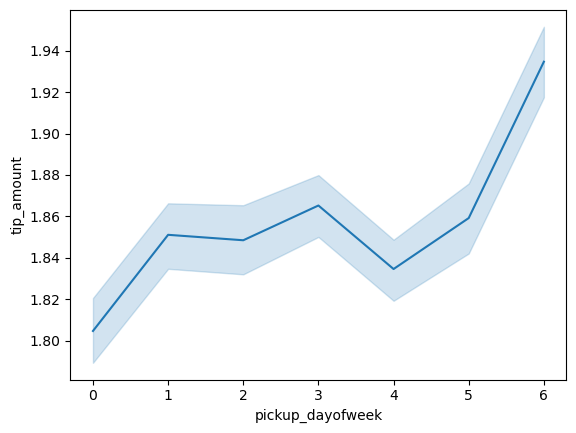

In [107]:
sns.lineplot(x='pickup_dayofweek',y='tip_amount',data = df)

### 18. Corealtion Matrix

<Axes: >

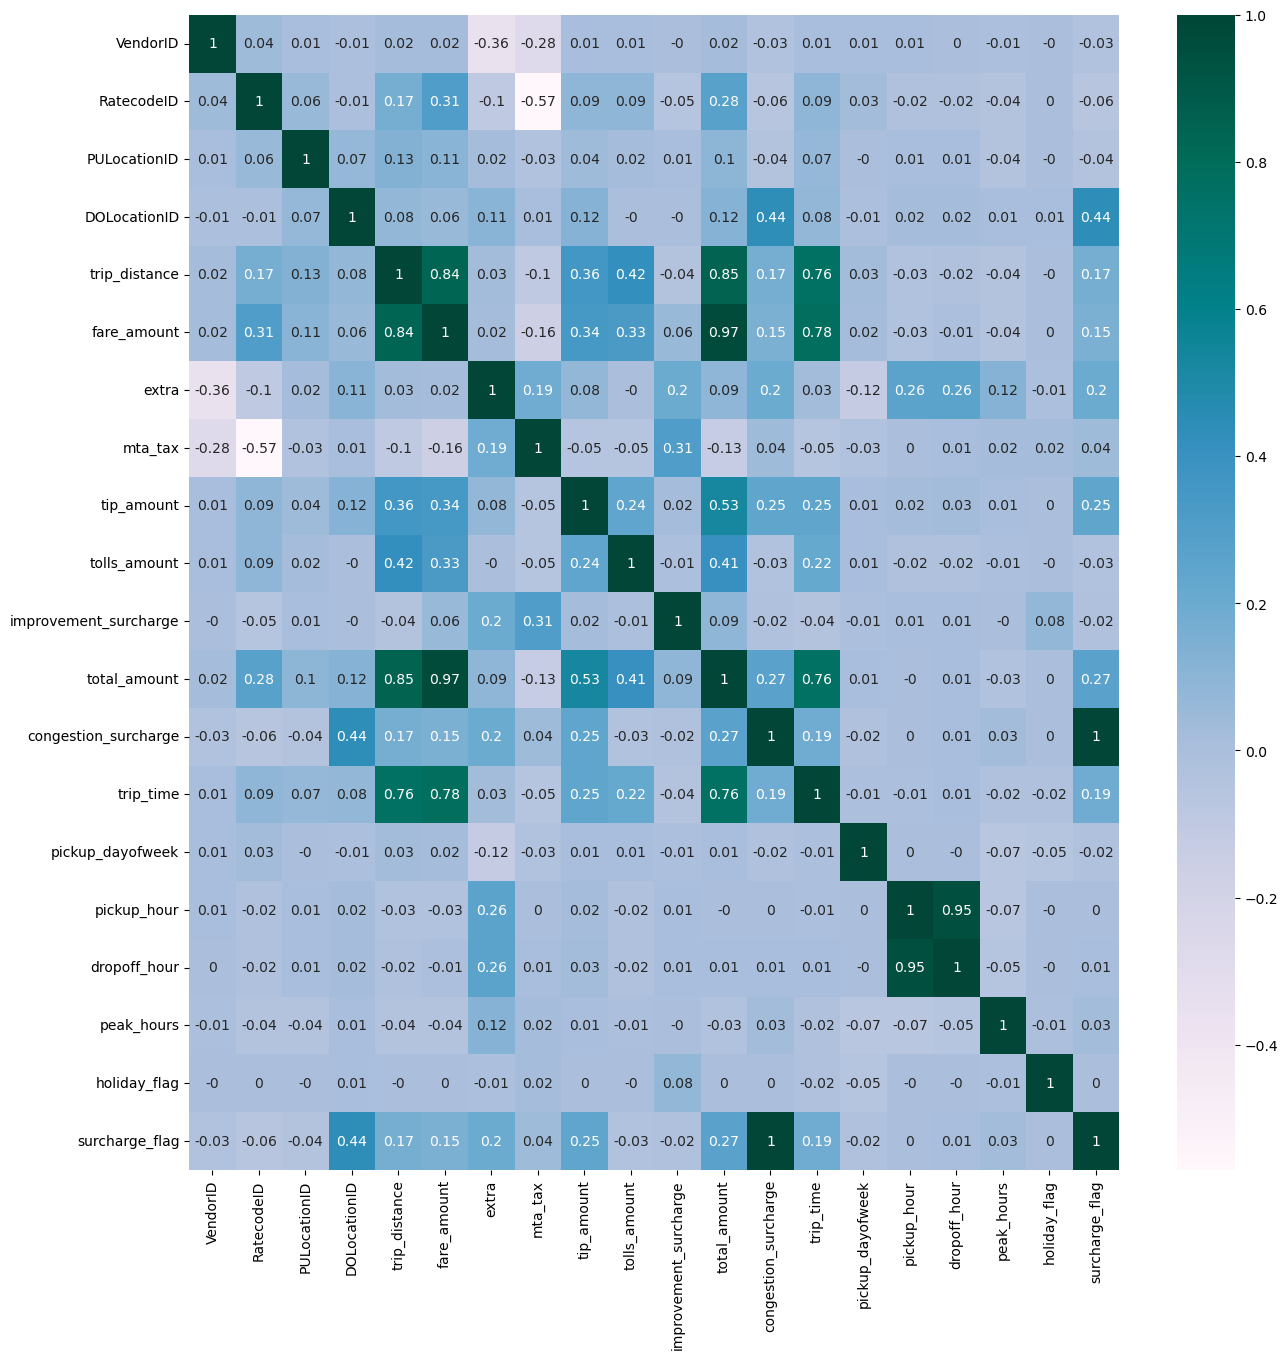

In [108]:
fig, ax =  plt.subplots(figsize=(15,15))
sns.heatmap(round(df.corr(),2), annot=True, cmap='PuBuGn')

In [109]:
print(df.corr())

                       VendorID  RatecodeID  PULocationID  DOLocationID  \
VendorID               1.000000    0.042400      0.007977     -0.008292   
RatecodeID             0.042400    1.000000      0.062131     -0.009395   
PULocationID           0.007977    0.062131      1.000000      0.070855   
DOLocationID          -0.008292   -0.009395      0.070855      1.000000   
trip_distance          0.015581    0.171415      0.125731      0.076947   
fare_amount            0.022609    0.313235      0.108572      0.062716   
extra                 -0.361728   -0.100214      0.020171      0.111086   
mta_tax               -0.276030   -0.570179     -0.034307      0.009238   
tip_amount             0.011730    0.094596      0.036762      0.116148   
tolls_amount           0.006849    0.085594      0.022106     -0.001958   
improvement_surcharge -0.000952   -0.046622      0.005404     -0.003018   
total_amount           0.020183    0.277541      0.099695      0.119307   
congestion_surcharge  -0.

In [110]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,drop_borough,drop_zone,drop_service_zone,trip_time,pickup_dayofweek,pickup_hour,dropoff_hour,peak_hours,holiday_flag,surcharge_flag
0,2,1.0,42,42,0.44,3.5,0.50,0.5,0.00,0.0,...,Manhattan,Central Harlem North,Boro Zone,1.20,5,0,0,0,1,0
1,1,1.0,116,41,2.10,9.5,0.50,0.5,0.00,0.0,...,Manhattan,Central Harlem,Boro Zone,8.72,5,0,0,0,1,0
2,1,1.0,41,140,3.70,14.5,3.25,0.5,4.60,0.0,...,Manhattan,Lenox Hill East,Yellow Zone,16.20,5,0,1,0,1,1
3,2,1.0,181,181,1.69,8.0,0.50,0.5,0.00,0.0,...,Brooklyn,Park Slope,Boro Zone,8.25,5,0,0,0,1,0
4,2,1.0,33,170,6.26,22.0,0.50,0.5,5.21,0.0,...,Manhattan,Murray Hill,Yellow Zone,21.03,5,0,0,0,1,1


## Splitting Dataset to Test-Train

In [111]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_borough', 'pickup_zone',
       'pickup_service_zone', 'drop_borough', 'drop_zone', 'drop_service_zone',
       'trip_time', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour',
       'peak_hours', 'holiday_flag', 'surcharge_flag'],
      dtype='object')

### 1. Price Prediction

In [112]:
df.pickup_service_zone.unique()

array(['Boro Zone', 'Yellow Zone', 'Airports', 'EWR'], dtype=object)

In [113]:
# Assigning 'fare_amount' as the target variable (y) and the rest of the columns as features (X)
y = df['fare_amount']
X = df.drop(columns=['fare_amount','pickup_borough', 'pickup_zone','pickup_service_zone', 'drop_borough', 'drop_zone', 'drop_service_zone'])
#X = X.drop(columns=['RatecodeID','trip_distance','extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge','trip_time', 'dropoff_hour','surcharge_flag'])
# Encoding categorical variables using one-hot encoding
print(X.columns)
X = pd.get_dummies(X, columns=['VendorID', 'peak_hours', 'holiday_flag', 'pickup_dayofweek', 'pickup_hour'])

# Splitting the data into training and testing sets with a 60-40 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'trip_time', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour',
       'peak_hours', 'holiday_flag', 'surcharge_flag'],
      dtype='object')


[0.60283318 0.96334379 0.99194384 0.99593686 0.9987252  0.99919032
 0.99941358 0.99955251 0.99963808 0.99970705 0.9997584  0.99979754
 0.99981642 0.9998326  0.99984847 0.99986401 0.99987884 0.99989211
 0.99990371 0.99991162 0.9999189  0.99992598 0.99993275 0.99993914
 0.99994507 0.99995092 0.99995654 0.99996191 0.99996709 0.99997217
 0.99997655 0.99998071 0.99998469 0.99998808 0.9999908  0.99999344
 0.99999505 0.99999634 0.99999743 0.99999828 0.99999887 0.99999936
 0.99999981 1.         1.         1.         1.         1.
 1.         1.         1.        ]


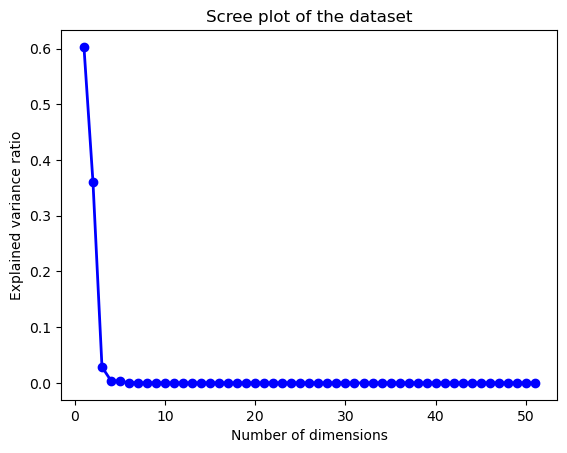

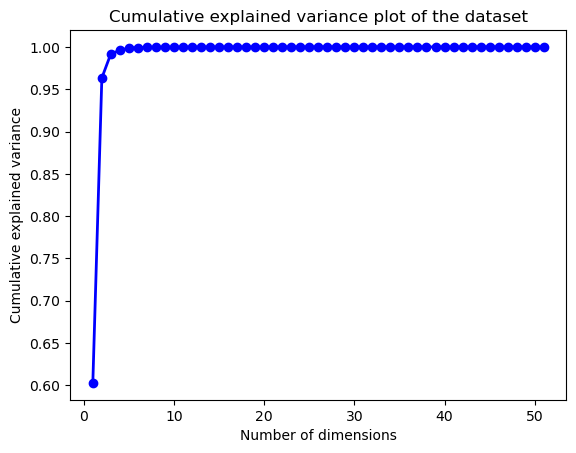

Here are the componets
[[-1.81950313e-05  1.36337811e-01  9.90249733e-01  3.65706868e-03
   1.17941474e-03  1.03985677e-05  4.16654569e-03  4.34233883e-05
  -5.09815231e-06  2.30898218e-02  7.07444207e-03  1.38945520e-02
   1.56675283e-03  2.57267313e-03  2.78637067e-05 -2.78637067e-05
  -8.43795811e-06  8.43795811e-06 -1.31422178e-05  1.31422178e-05
   4.40539573e-05  2.15257221e-05  1.56038072e-05 -2.11593759e-05
  -5.54193103e-05 -4.23861223e-05  3.77813220e-05 -9.75289600e-06
  -8.12473548e-06 -7.88253398e-06 -4.35262326e-06  2.54734459e-07
   3.39651063e-06 -3.00785663e-05 -5.88867007e-05 -2.96420002e-05
   1.51665996e-05  1.39438244e-05  1.16425607e-05  2.35695563e-05
  -6.41897135e-06 -6.77479590e-06 -7.53893022e-06  3.10579169e-06
   1.00569433e-05  3.45773158e-05  2.32219758e-05  1.55448097e-05
   1.76871757e-05  8.02169175e-06 -1.07367366e-05]
 [ 7.60179630e-04  9.90281738e-01 -1.36977233e-01  5.88834350e-03
   9.32048319e-06 -8.87521841e-05  9.19373808e-04  4.79330059e-04
  

In [114]:
# Perform PCA on the dataset and calculate the explained variance ratio
pca = PCA(n_components=X.shape[1])  # Define PCA with the number of components equal to the number of features
pca.fit(X)  # Fit PCA to the dataset
explained_variance_ratio = pca.explained_variance_ratio_  # Get explained variance ratio

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Display the cumulative explained variance
print(cumulative_explained_variance)

# Visualize the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2)
plt.xlabel('Number of dimensions')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot of the dataset')
plt.show()

# Visualize the cumulative explained variance plot
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance plot of the dataset')
plt.show()


# Define PCA with 3 components
pca = PCA(n_components=3)
# Fit PCA to the training data
pca.fit(X_train)
print("Here are the componets")
print(pca.components_)


# Transform the training and test data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [115]:
# Assuming pca.components_ contains the output you provided
components_data = pd.DataFrame(pca.components_, columns=X_train.columns)

# Display the top contributing features for each principal component
for i, component in enumerate(components_data.iterrows()):
    top_features = component[1].abs().sort_values(ascending=False).head(5)
    print(f"\nTop features for Principal Component {i + 1}:\n{top_features}")



Top features for Principal Component 1:
DOLocationID            0.990250
PULocationID            0.136338
total_amount            0.023090
trip_time               0.013895
congestion_surcharge    0.007074
Name: 0, dtype: float64

Top features for Principal Component 2:
PULocationID     0.990282
DOLocationID     0.136977
total_amount     0.018999
trip_time        0.013223
trip_distance    0.005888
Name: 1, dtype: float64

Top features for Principal Component 3:
total_amount     0.741381
trip_time        0.648533
trip_distance    0.150803
tip_amount       0.069508
PULocationID     0.027091
Name: 2, dtype: float64


## Modeling

In [116]:
## Linear Regression:
def tuned_linear_regression(X_train, y_train, X_test, y_test, param_grid=None):
    lm = LinearRegression()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'fit_intercept': [None, True, False]}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(lm, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_lm = grid_search.best_estimator_
    y_pred = best_lm.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
tuned_linear_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'fit_intercept': True}
Mean Squared Error: 14.073466396964264
R-squared: 0.8909914261340622
Adjusted R-squared: 0.8909914261340622
Mean Absoute Error: 1.710739515194066
Predicted Prices: [ 7.00997024 14.15564257  5.33851238 ...  8.87855738 11.88016331
  3.52199682]
Actual Prices: 63023     10.0
305095    13.5
650788     5.0
Name: fare_amount, dtype: float64


In [117]:
## Decision Tree Regression:
def tuned_decisiontree_regression(X_train, y_train, X_test, y_test, param_grid=None):
    dtr_model = DecisionTreeRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'max_depth': [3, 5, 7],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': [None, 'sqrt', 'log2'],
                        'criterion': ['mse', 'friedman_mse', 'mae']}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(dtr_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))

tuned_decisiontree_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4}
Mean Squared Error: 11.241666512966404
R-squared: 0.9129256432005073
Adjusted R-squared: 0.9129256432005073
Mean Absoute Error: 1.6111730909835407
Predicted Prices: [ 7.06888527 13.42099175  7.06888527 ...  7.87377276 11.29944964
  4.84469962]
Actual Prices: 63023     10.0
305095    13.5
650788     5.0
Name: fare_amount, dtype: float64


In [118]:
## KNN Regression:
def tuned_KNN_regression(X_train, y_train, X_test, y_test, param_grid=None):
    knn_model = KNeighborsRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(knn_model, param_grid, cv=2)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))

tuned_KNN_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error: 9.906789183553354
R-squared: 0.9232651764655084
Adjusted R-squared: 0.9232651764655084
Mean Absoute Error: 1.2426588789038173
Predicted Prices: [ 6.90434618 12.59883067  5.91385819 ...  9.33518835 12.3941121
  4.92237387]
Actual Prices: 63023     10.0
305095    13.5
650788     5.0
Name: fare_amount, dtype: float64


In [119]:
## Lasso Regression:
def tuned_lasso_regression(X_train, y_train, X_test, y_test, param_grid=None):
    lasso_model = Lasso()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'alpha': [0.001, 0.01,0.01838973299508956, 0.1, 1, 10]}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(lasso_model, param_grid, cv=3)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))

tuned_lasso_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'alpha': 0.01}
Mean Squared Error: 14.073528291256604
R-squared: 0.8909909467206506
Adjusted R-squared: 0.8909909467206506
Mean Absoute Error: 1.7105841082869655
Predicted Prices: [ 7.01041302 14.15539607  5.33920264 ...  8.87854348 11.88009026
  3.5227343 ]
Actual Prices: 63023     10.0
305095    13.5
650788     5.0
Name: fare_amount, dtype: float64


In [120]:
#Random Forest Regressor:

def tuned_rf_regression(X_train, y_train, X_test, y_test, param_grid=None):
    rf_model = RandomForestRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_estimators': [50, 100],
                        'max_depth': [5, 10],
                        'min_samples_split': [2, 5],
                        'min_samples_leaf': [1, 2],
                        'max_features': ['sqrt', 'log2']}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(rf_model, param_grid, cv=3)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))

tuned_rf_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 12.023239197037338
R-squared: 0.9068718309228496
Adjusted R-squared: 0.9068718309228496
Mean Absoute Error: 1.4861103480320825
Predicted Prices: [ 8.03297683 13.02279569  5.90186604 ... 10.56899969 11.25065702
  5.2560061 ]
Actual Prices: 63023     10.0
305095    13.5
650788     5.0
Name: fare_amount, dtype: float64
